In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

### ALL txs 

In [31]:
df1 = pd.read_csv('txs_part_1.csv', index_col=False)
df1 = df1.rename(columns={'CurrentValue @ $1103.16/Eth': 'CurrentValue/Eth'})
df1.shape

(5000, 16)

In [32]:
df2 = pd.read_csv('txs_part_2.csv', index_col=False)
df2 = df2.rename(columns={'CurrentValue @ $1103.52/Eth': 'CurrentValue/Eth'})
df2.shape

(2959, 16)

In [33]:
merged_df= df1.merge(df2, how= 'outer')
merged_df.head()

,Txhash,Blockno,UnixTimestamp,DateTime,From,To,ContractAddress,Value_IN(ETH),Value_OUT(ETH),CurrentValue/Eth,TxnFee(ETH),TxnFee(USD),Historical $Price/Eth,Status,ErrCode,Method
0,0x4c3b415bb98370a9ef572567a4e13b61759763c08192...,10595414,1596572493,2020-08-04 20:21:33,0x04045a6c0a9f6ece044510c51b974400ade3ca5b,0x99fd1378ca799ed6772fe7bcdc9b30b389518962,NaN,1.000000,0.0,1.103160e+03,0.000882,0.972987,389.79,NaN,NaN,Transfer
1,0xdf08f1b6048a3c151737d797c5a5da5892cff66dfdfd...,10595437,1596572800,2020-08-04 20:26:40,0x99fd1378ca799ed6772fe7bcdc9b30b389518962,0x6317c5e82a06e1d8bf200d21f4510ac2c038ac81,NaN,0.000000,0.1,1.103160e+02,0.014775,16.299434,389.79,NaN,NaN,0x4e7ffa04
2,0x88877e0aff3d534341cbb11d9fa19e5c807a164efd3f...,10601283,1596651242,2020-08-05 18:14:02,0x04045a6c0a9f6ece044510c51b974400ade3ca5b,0x99fd1378ca799ed6772fe7bcdc9b30b389518962,NaN,9.156451,0.0,1.010103e+04,0.001050,1.158318,401.12,NaN,NaN,Transfer
3,0x63f876ae7c626619a740f26d135dc187f2c1dd24d42f...,10601303,1596651529,2020-08-05 18:18:49,0x99fd1378ca799ed6772fe7bcdc9b30b389518962,0x32666b64e9fd0f44916e1378efb2cfa3b3b96e80,NaN,0.000000,0.0,0.000000e+00,0.004291,4.733408,401.12,NaN,NaN,Mint
4,0x12c77d689b0a62785e4ab18999382e8ce24c2b927bad...,10601518,1596654093,2020-08-05 19:01:33,0xc098b2a3aa256d2140208c3de6543aaef5cd3a94,0x99fd1378ca799ed6772fe7bcdc9b30b389518962,NaN,2228.526819,0.0,2.458422e+06,0.000983,1.084186,401.12,NaN,NaN,Transfer


In [34]:
merged_df.shape

(7959, 16)

In [35]:
# create user dataframe 
user_df = merged_df[['Txhash', 'Blockno','DateTime', 'From', 'To','Method']]
user_df = user_df.rename(columns= ({'To' : 'ContractAddress'}))              
user_df

,Txhash,Blockno,DateTime,From,ContractAddress,Method
0,0x4c3b415bb98370a9ef572567a4e13b61759763c08192...,10595414,2020-08-04 20:21:33,0x04045a6c0a9f6ece044510c51b974400ade3ca5b,0x99fd1378ca799ed6772fe7bcdc9b30b389518962,Transfer
1,0xdf08f1b6048a3c151737d797c5a5da5892cff66dfdfd...,10595437,2020-08-04 20:26:40,0x99fd1378ca799ed6772fe7bcdc9b30b389518962,0x6317c5e82a06e1d8bf200d21f4510ac2c038ac81,0x4e7ffa04
2,0x88877e0aff3d534341cbb11d9fa19e5c807a164efd3f...,10601283,2020-08-05 18:14:02,0x04045a6c0a9f6ece044510c51b974400ade3ca5b,0x99fd1378ca799ed6772fe7bcdc9b30b389518962,Transfer
3,0x63f876ae7c626619a740f26d135dc187f2c1dd24d42f...,10601303,2020-08-05 18:18:49,0x99fd1378ca799ed6772fe7bcdc9b30b389518962,0x32666b64e9fd0f44916e1378efb2cfa3b3b96e80,Mint
4,0x12c77d689b0a62785e4ab18999382e8ce24c2b927bad...,10601518,2020-08-05 19:01:33,0xc098b2a3aa256d2140208c3de6543aaef5cd3a94,0x99fd1378ca799ed6772fe7bcdc9b30b389518962,Transfer
...,...,...,...,...,...,...
7954,0x5dbe1e8d515ea5eb791869ff4a1712ae99f2046593f2...,15002273,2022-06-21 12:20:01,0x99fd1378ca799ed6772fe7bcdc9b30b389518962,0xf650c3d88d12db855b8bf7d11be6c55a4e07dcc9,Borrow
7955,0x66a291561ae9523797464cdb6313eb3a5e153fa1c22c...,15002279,2022-06-21 12:21:46,0x99fd1378ca799ed6772fe7bcdc9b30b389518962,0xdac17f958d2ee523a2206206994597c13d831ec7,Transfer
7956,0x116d353284aea63fdb93bfd051572676fd9f51f12614...,15011660,2022-06-23 06:39:50,0x99fd1378ca799ed6772fe7bcdc9b30b389518962,0xf650c3d88d12db855b8bf7d11be6c55a4e07dcc9,Repay Borrow
7957,0x616645142b4b8d32cbf1eec0ea2cee745d8f7114df36...,15012717,2022-06-23 11:24:42,0x99fd1378ca799ed6772fe7bcdc9b30b389518962,0x4ddc2d193948926d02f9b1fe9e1daa0718270ed5,Redeem


In [36]:
# count of frequency 
user_df.Method.value_counts()

Transfer                                                       905
Approve                                                        539
Deposit                                                        506
Borrow                                                         491
Mint                                                           436
                                                              ... 
Delegate                                                         1
Deposit ERC20For User                                            1
Unstake                                                          1
Swap                                                             1
Swap Exact Tokens For ETH Supporting Fee On Transfer Tokens      1
Name: Method, Length: 117, dtype: int64

In [37]:
# number of unique data in each colomn
user_df.nunique()

Txhash             7954
Blockno            7389
DateTime           7389
From                 54
ContractAddress     397
Method              117
dtype: int64

In [38]:
# the value that appears most often in the colomn "From"
user_df.From.mode()

0    0x99fd1378ca799ed6772fe7bcdc9b30b389518962
Name: From, dtype: object

In [39]:
# the value that appears most often in the colomn "ContractAddress"
user_df.ContractAddress.mode()

0    0xdef1c0ded9bec7f1a1670819833240f027b25eff
Name: ContractAddress, dtype: object

### averege number of txs

In [40]:
tot_number_of_txs = len(user_df['Txhash'])
numer_of_unique_resiever = user_df.ContractAddress.nunique()
avg_value_of_txs = tot_number_of_txs / numer_of_unique_resiever
avg_value_of_txs

20.047858942065492

In [41]:
#number of tx's by unique sender
user_df.From.value_counts(normalize=True).head(10)


0x99fd1378ca799ed6772fe7bcdc9b30b389518962    0.958035
0xc098b2a3aa256d2140208c3de6543aaef5cd3a94    0.012941
0x2a67035357c3045438f3a92e46870a9e48e5aab7    0.011308
0x937cdc9e86ba06aa5aaea221017a1d9fc7f59efd    0.005151
0x1ec4de886d40d487366cde7664767db1df6a02e7    0.003141
0xc333e80ef2dec2805f239e3f1e810612d294f771    0.001005
0x58f56615180a8eea4c462235d9e215f72484b4a3    0.000880
0xeb40a64c0f87922b2f0696c7308b7a674deffba5    0.000377
0x37d5c0b8dee9ed63291f3e734f96cacd8cf3b73e    0.000377
0xab07bf2548bc22b9211469a11d09f83d26611d72    0.000377
Name: From, dtype: float64

In [42]:
#number of tx's by unique reciever
user_df.ContractAddress.value_counts(normalize=True).head(30)


0xdef1c0ded9bec7f1a1670819833240f027b25eff    0.061691
0x39aa39c021dfbae8fac545936693ac917d5e7563    0.046488
0x99fd1378ca799ed6772fe7bcdc9b30b389518962    0.046111
0xd061d61a4d941c39e5453435b6345dc261c2fce0    0.042719
0x4ddc2d193948926d02f9b1fe9e1daa0718270ed5    0.041211
0xf650c3d88d12db855b8bf7d11be6c55a4e07dcc9    0.035809
0x7a250d5630b4cf539739df2c5dacb4c659f2488d    0.025757
0xccf4429db6322d5c611ee964527d42e5d685dd6a    0.024877
0x5d3a536e4d6dbd6114cc1ead35777bab948e3643    0.022742
0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48    0.022490
0x920d9bd936da4eafb5e25c6bdc9f6cb528953f9f    0.021988
0x3d9819210a31b4961b30ef54be2aed79b9c9cd3b    0.020480
0xbebc44782c7db0a1a60cb6fe97d0b483032ff1c7    0.020229
0xdac17f958d2ee523a2206206994597c13d831ec7    0.018093
0xa79828df1850e8a3a3064576f380d90aecdd3359    0.018093
0x094d12e5b541784701fd8d65f11fc0598fbc6332    0.015957
0xd9e1ce17f2641f24ae83637ab66a2cca9c378b9f    0.014826
0xd533a949740bb3306d119cc777fa900ba034cd52    0.013444
0xc2edad66

### addresses used more often than AVG

In [43]:
txs_by_address=user_df.groupby(['ContractAddress'])\
                      .agg({'Method':'count'})\
                      .rename(columns={"Method": "number_of_txs"})\
                      .query('number_of_txs > 20.048')\
                      .sort_values(by='number_of_txs', ascending=False)
                      
txs_by_address.reset_index()

,ContractAddress,number_of_txs
0,0xdef1c0ded9bec7f1a1670819833240f027b25eff,491
1,0x39aa39c021dfbae8fac545936693ac917d5e7563,370
2,0x99fd1378ca799ed6772fe7bcdc9b30b389518962,367
3,0xd061d61a4d941c39e5453435b6345dc261c2fce0,340
4,0x4ddc2d193948926d02f9b1fe9e1daa0718270ed5,328
...,...,...
69,0x6317c5e82a06e1d8bf200d21f4510ac2c038ac81,22
70,0x067d4d3ce63450e74f880f86b5b52ea3edf9db0f,22
71,0x9dd5b5c71842a4fd51533532e5470298bfa398fd,22
72,0xa5407eae9ba41422680e2e00537571bcc53efbfd,21


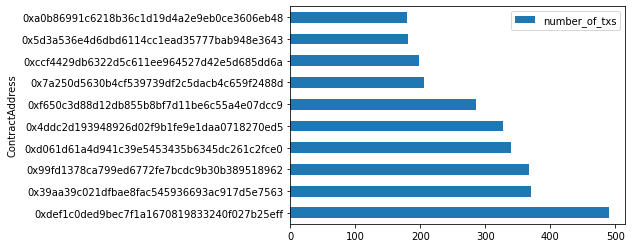

In [44]:
ax = txs_by_address.head(10).plot.barh(rot=0)


### ERC20 Token

In [45]:
df_ERC20 = pd.read_csv('ERC_20_part_1.csv', index_col=False)
df_ERC20_2 = pd.read_csv('ERC_20_part_2.csv', index_col=False)
df_ERC20_3 = pd.read_csv('ERC_20_part_3.csv', index_col=False)
erc20_df= df_ERC20.merge(df_ERC20_2, how= 'outer')
tot_erc20= erc20_df.merge(df_ERC20_3, how= 'outer')
tot_erc20.head()



,Txhash,UnixTimestamp,DateTime,From,To,Value,ContractAddress,TokenName,TokenSymbol
0,0x8493f85b1c77d0296ad46cf244563e078873da4e91a2...,1606788524,2020-12-01 02:08:44,0x3d9819210a31b4961b30ef54be2aed79b9c9cd3b,0x99fd1378ca799ed6772fe7bcdc9b30b389518962,9.627809186766197696,0xc00e94cb662c3520282e6f5717214004a7f26888,Compound,COMP
1,0x8493f85b1c77d0296ad46cf244563e078873da4e91a2...,1606788524,2020-12-01 02:08:44,0x39aa39c021dfbae8fac545936693ac917d5e7563,0x99fd1378ca799ed6772fe7bcdc9b30b389518962,"2,312,972.026827",0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USD Coin,USDC
2,0x67e6d99aa290ea7712f77b3729d720d7a4c73590f369...,1606788700,2020-12-01 02:11:40,0x99fd1378ca799ed6772fe7bcdc9b30b389518962,0x094d12e5b541784701fd8d65f11fc0598fbc6332,"10,609.30770868615774208",0x674c6ad92fd080e4004b2312b45f796a192d27a0,Neutrino USD,USDN
3,0x67e6d99aa290ea7712f77b3729d720d7a4c73590f369...,1606788700,2020-12-01 02:11:40,0x99fd1378ca799ed6772fe7bcdc9b30b389518962,0x094d12e5b541784701fd8d65f11fc0598fbc6332,"2,312,972.026827",0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USD Coin,USDC
4,0x67e6d99aa290ea7712f77b3729d720d7a4c73590f369...,1606788700,2020-12-01 02:11:40,0x094d12e5b541784701fd8d65f11fc0598fbc6332,0x99fd1378ca799ed6772fe7bcdc9b30b389518962,"2,311,677.10942819944146345",0x4f3e8f405cf5afc05d68142f3783bdfe13811522,Curve.fi USDN/3Crv,usdn3CRV


In [46]:
tot_erc20.From.value_counts(normalize=True).head()

0x99fd1378ca799ed6772fe7bcdc9b30b389518962    0.339218
0x0000000000000000000000000000000000000000    0.137182
0x3d9819210a31b4961b30ef54be2aed79b9c9cd3b    0.046928
0x39aa39c021dfbae8fac545936693ac917d5e7563    0.018825
0x2faf487a4414fe77e2327f0bf4ae2a264a776ad2    0.018555
Name: From, dtype: float64

In [47]:
tot_erc20.From.nunique()

686

In [48]:
tot_erc20.From.mode()

0    0x99fd1378ca799ed6772fe7bcdc9b30b389518962
Name: From, dtype: object

In [49]:
tot_erc20.ContractAddress.value_counts(normalize=True)

0xd533a949740bb3306d119cc777fa900ba034cd52    0.121149
0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48    0.105116
0xdac17f958d2ee523a2206206994597c13d831ec7    0.094668
0xc00e94cb662c3520282e6f5717214004a7f26888    0.061430
0x4e3fbd56cd56c3e72c1403e103b45db9da5b9d2b    0.051973
                                                ...   
0x4d98ed5510dc8d9e06e7f24d0b8a257c62ca5b2b    0.000090
0xfb8688a7eb1ad431f3957103b2bd014fb2228cfa    0.000090
0xfb8c4fbdb022e502593ef07161ecc424983cc1f1    0.000090
0x01180d350f23e143d9bd4627355866ba5a39ec32    0.000090
0x818430846709b978612737e887d4f19b331576c0    0.000090
Name: ContractAddress, Length: 574, dtype: float64

In [50]:
tot_erc20.ContractAddress.nunique()

574

In [51]:
tot_erc20.ContractAddress.mode()

0    0xd533a949740bb3306d119cc777fa900ba034cd52
Name: ContractAddress, dtype: object

### averege number of txs by token

In [52]:
number_of_txs = len(tot_erc20['Txhash'])
numer_of_unique_contracts = tot_erc20.ContractAddress.nunique()
avg_value_of_txs_t = number_of_txs / numer_of_unique_contracts
avg_value_of_txs_t

19.341463414634145

### addresses by token used more often than AVG

In [53]:
txs_by_token=tot_erc20.groupby(['ContractAddress','TokenSymbol'])\
                      .agg({'TokenSymbol':'count'})\
                      .rename(columns={"TokenSymbol": "numer_of_unique_token"})\
                      .query('numer_of_unique_token > 19.341')\
                      .sort_values(by='numer_of_unique_token', ascending=False)
       
txs_by_token.reset_index().head(10)

,ContractAddress,TokenSymbol,numer_of_unique_token
0,0xd533a949740bb3306d119cc777fa900ba034cd52,CRV,1345
1,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC,1167
2,0xdac17f958d2ee523a2206206994597c13d831ec7,USDT,1051
3,0xc00e94cb662c3520282e6f5717214004a7f26888,COMP,682
4,0x4e3fbd56cd56c3e72c1403e103b45db9da5b9d2b,CVX,577
5,0x6b175474e89094c44da98b954eedeac495271d0f,DAI,525
6,0x2260fac5e5542a773aa44fbcfedf7c193bc2c599,WBTC,486
7,0x99d8a9c45b2eca8864373a26d1459e3dff1e17f3,MIM,310
8,0x4f3e8f405cf5afc05d68142f3783bdfe13811522,usdn3CRV,269
9,0x5a6a4d54456819380173272a5e8e9b9904bdf41b,MIM-3LP3CRV-f,264


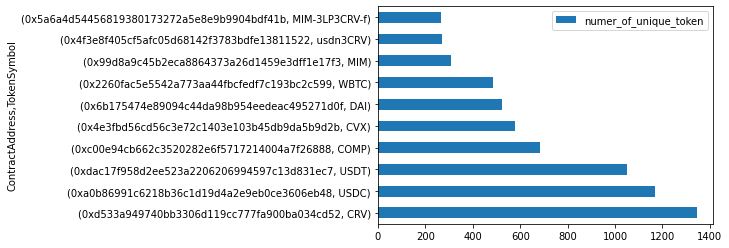

In [54]:
ax = txs_by_token.head(10).plot.barh(rot=0)